In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('polarBear_hairCortisol_alaska_durner_1983_2016.csv')
df

,bearID,sampleDate,sampleTime,latitude,longitude,agency,sex,bearAge,ageCode,cubAgeClass,reproClass,SLBL,correctedSLBL,girth,mass,cortisolAssay_pg_mg,Unnamed: 16,Unnamed: 17
0,1,1985-05-11,18:57,70.6167,-147.3667,usgs,F,16.0,A,C0,IF,191.0,204.76,117.0,204.12,8.6381,NaN,NaN
1,1,1988-10-20,14:47,70.4333,-146.9833,usgs,F,19.0,A,C0,E0,NaN,NaN,NaN,NaN,3.5812,NaN,NaN
2,2,1984-03-28,14:07,71.5333,-155.5333,usgs,F,13.0,A,C1,E0,188.0,201.76,118.0,215.46,5.0706,NaN,NaN
3,3,1984-04-09,13:19,70.6167,-147.0667,usgs,F,11.0,A,NaN,UF,189.0,202.76,127.0,240.40,5.2555,NaN,NaN
4,4,1984-05-06,12:16,70.7167,-148.1333,usgs,M,16.0,A,NaN,AM,222.0,237.65,169.0,444.97,7.2981,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,461,2014-04-09,12:53,70.8455,-147.4522,usgs,M,16.0,A,NaN,AM,234.4,234.40,162.0,462.66,4.6308,NaN,NaN
513,462,2010-04-12,18:09,70.3688,-142.7168,usgs,F,8.0,A,C0,IF,192.0,192.00,113.4,169.64,4.6128,NaN,NaN
514,463,2009-05-08,18:39,70.6994,-147.6570,usgs,F,10.0,A,NaN,UF,199.2,199.20,124.7,195.50,5.2445,NaN,NaN
515,464,2006-04-03,0:00,71.4807,-156.4174,usgs,F,13.0,A,C1,E0,NaN,NaN,NaN,NaN,8.2635,NaN,NaN


In [3]:
#Want to find out if the date is being read as a date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bearID               517 non-null    int64  
 1   sampleDate           517 non-null    object 
 2   sampleTime           517 non-null    object 
 3   latitude             517 non-null    float64
 4   longitude            517 non-null    float64
 5   agency               517 non-null    object 
 6   sex                  517 non-null    object 
 7   bearAge              516 non-null    float64
 8   ageCode              517 non-null    object 
 9   cubAgeClass          154 non-null    object 
 10  reproClass           517 non-null    object 
 11  SLBL                 251 non-null    float64
 12  correctedSLBL        251 non-null    float64
 13  girth                251 non-null    float64
 14  mass                 251 non-null    float64
 15  cortisolAssay_pg_mg  517 non-null    flo

In [19]:
#Narrowing down the columns to only the factors I'm interested in and making the dates being read as dates
df1 = pd.read_csv('polarBear_hairCortisol_alaska_durner_1983_2016.csv', parse_dates=[0], usecols = ['sampleDate','sampleTime','latitude','longitude','sex','bearAge','mass','cortisolAssay_pg_mg'])
df1

,sampleDate,sampleTime,latitude,longitude,sex,bearAge,mass,cortisolAssay_pg_mg
0,1985-05-11,18:57,70.6167,-147.3667,F,16.0,204.12,8.6381
1,1988-10-20,14:47,70.4333,-146.9833,F,19.0,NaN,3.5812
2,1984-03-28,14:07,71.5333,-155.5333,F,13.0,215.46,5.0706
3,1984-04-09,13:19,70.6167,-147.0667,F,11.0,240.40,5.2555
4,1984-05-06,12:16,70.7167,-148.1333,M,16.0,444.97,7.2981
...,...,...,...,...,...,...,...,...
512,2014-04-09,12:53,70.8455,-147.4522,M,16.0,462.66,4.6308
513,2010-04-12,18:09,70.3688,-142.7168,F,8.0,169.64,4.6128
514,2009-05-08,18:39,70.6994,-147.6570,F,10.0,195.50,5.2445
515,2006-04-03,0:00,71.4807,-156.4174,F,13.0,NaN,8.2635


In [5]:
#Double checking that dates are being read as datetime now
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   sampleDate           517 non-null    datetime64[ns]
 1   sampleTime           517 non-null    object        
 2   latitude             517 non-null    float64       
 3   longitude            517 non-null    float64       
 4   sex                  517 non-null    object        
 5   bearAge              516 non-null    float64       
 6   mass                 251 non-null    float64       
 7   cortisolAssay_pg_mg  517 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 32.4+ KB


In [6]:
#Indexing dates
catalog= df1.set_index('sampleDate')
catalog

,sampleTime,latitude,longitude,sex,bearAge,mass,cortisolAssay_pg_mg
sampleDate,,,,,,,
1985-05-11,18:57,70.6167,-147.3667,F,16.0,204.12,8.6381
1988-10-20,14:47,70.4333,-146.9833,F,19.0,NaN,3.5812
1984-03-28,14:07,71.5333,-155.5333,F,13.0,215.46,5.0706
1984-04-09,13:19,70.6167,-147.0667,F,11.0,240.40,5.2555
1984-05-06,12:16,70.7167,-148.1333,M,16.0,444.97,7.2981
...,...,...,...,...,...,...,...
2014-04-09,12:53,70.8455,-147.4522,M,16.0,462.66,4.6308
2010-04-12,18:09,70.3688,-142.7168,F,8.0,169.64,4.6128
2009-05-08,18:39,70.6994,-147.6570,F,10.0,195.50,5.2445


In [7]:
#Want to get an idea of the basic statistics
catalog.describe()

,latitude,longitude,bearAge,mass,cortisolAssay_pg_mg
count,517.000000,517.000000,516.000000,251.000000,517.000000
mean,70.100187,-152.277380,9.189922,219.790159,6.165812
std,1.646400,8.749203,5.442977,82.747426,5.327251
min,63.200000,-172.166700,2.000000,113.400000,0.311400
25%,70.144900,-156.683100,4.000000,169.415000,3.476000
50%,70.615400,-148.716700,8.000000,191.420000,4.662700
75%,71.050000,-146.091300,13.000000,231.785000,6.171900
max,73.166700,-137.216700,30.000000,530.700000,36.092500


In [8]:
#Interested in sorting the years so I'm not plotting 500+ points
df1["sampleDate"].dt.year

0      1985
1      1988
2      1984
3      1984
4      1984
       ... 
512    2014
513    2010
514    2009
515    2006
516    2013
Name: sampleDate, Length: 517, dtype: int64

In [9]:
#Ordering dates from older to younger years
catalog.sort_values(by='sampleDate', inplace=True)
catalog

,sampleTime,latitude,longitude,sex,bearAge,mass,cortisolAssay_pg_mg
sampleDate,,,,,,,
1983-04-13,13:25,70.6167,-146.9500,F,8.0,181.44,6.1440
1983-04-14,16:40,70.9333,-146.2167,F,2.0,NaN,4.4128
1983-04-16,15:40,70.7167,-146.5167,M,9.0,303.91,5.6069
1983-04-16,15:40,70.7167,-146.5167,F,6.0,156.49,5.8103
1983-04-17,15:09,70.4667,-147.1333,F,6.0,169.19,5.9513
...,...,...,...,...,...,...,...
2016-04-12,12:00,66.5289,-167.5197,F,21.0,NaN,6.7411
2016-04-14,12:00,67.2910,-166.4001,F,10.0,NaN,3.3051
2016-04-14,12:00,67.0708,-166.8612,F,5.0,NaN,4.2572


In [10]:
#Deciding to narrow down to 2004. Want to see the earliest date in 2004
df1[df1.sampleDate.dt.year.eq(2004)]

,sampleDate,sampleTime,latitude,longitude,sex,bearAge,mass,cortisolAssay_pg_mg
65,2004-04-03,0:00,71.4700,-155.6984,F,21.0,NaN,4.2577
92,2004-04-04,0:00,71.5053,-153.7786,F,22.0,NaN,7.5687
146,2004-04-14,0:00,70.7514,-147.3449,F,23.0,NaN,25.0745
179,2004-05-01,0:00,70.1425,-141.1200,M,17.0,NaN,15.3252
182,2004-04-06,0:00,71.4430,-155.7299,F,15.0,NaN,1.4150
...,...,...,...,...,...,...,...,...
343,2004-04-27,0:00,70.5487,-142.5592,F,9.0,NaN,13.9302
344,2004-04-29,0:00,70.1999,-143.5986,F,5.0,NaN,26.7968
345,2004-05-01,0:00,70.1048,-142.0870,F,10.0,NaN,0.4075
346,2004-05-01,0:00,70.1048,-142.0870,M,18.0,NaN,11.1816


In [11]:
#Want to see latest date in 2016 (as the last data point the graphs go to)
df1[df1.sampleDate.dt.year.eq(2016)]

,sampleDate,sampleTime,latitude,longitude,sex,bearAge,mass,cortisolAssay_pg_mg
422,2016-04-06,12:00,67.0715,-166.4683,F,17.0,NaN,5.6774
425,2016-04-14,12:00,67.5130,-166.0492,M,13.0,NaN,4.3966
480,2016-04-05,12:00,67.6516,-166.4784,M,5.0,NaN,5.9895
489,2016-03-29,12:00,67.4176,-167.9318,F,19.0,NaN,5.2035
490,2016-04-06,12:00,67.0996,-166.4566,M,8.0,NaN,6.3228
491,2016-03-22,12:00,66.7694,-166.4526,M,12.0,NaN,5.8048
492,2016-03-25,12:00,67.5385,-167.6616,M,3.0,NaN,12.6429
493,2016-03-26,12:00,67.5723,-167.5972,F,12.0,NaN,5.3719
494,2016-03-28,12:00,67.5087,-167.8084,F,6.0,NaN,3.4159
495,2016-04-05,12:00,67.6118,-166.2185,F,4.0,NaN,4.3985


In [21]:
#Narrowing data to be from 2004-2016
newdata = catalog.loc['2004-03-26':'2016-04-26']
newdata

,sampleTime,latitude,longitude,sex,bearAge,mass,cortisolAssay_pg_mg
sampleDate,,,,,,,
2004-03-26,15:51,71.5817,-155.4148,F,4.0,147.42,21.5851
2004-03-26,12:45,71.4519,-155.8404,F,6.0,181.44,23.9753
2004-03-26,11:10,71.3854,-156.0057,M,14.0,408.23,3.1542
2004-03-28,15:40,71.5149,-155.8514,F,5.0,158.76,17.1294
2004-03-28,13:43,71.4739,-155.8843,M,3.0,136.08,12.7531
...,...,...,...,...,...,...,...
2016-04-12,12:00,66.5289,-167.5197,F,21.0,NaN,6.7411
2016-04-14,12:00,67.2910,-166.4001,F,10.0,NaN,3.3051
2016-04-14,12:00,67.0708,-166.8612,F,5.0,NaN,4.2572


Text(0, 0.5, 'Cortisol levels (mg)')

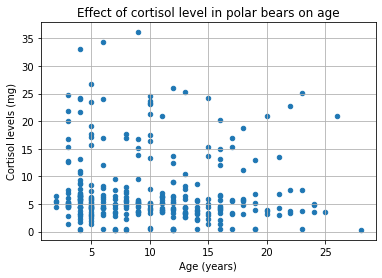

In [22]:
newdata.plot(kind='scatter', x='bearAge', y='cortisolAssay_pg_mg', grid=True)
plt.title('Effect of cortisol level in polar bears on age')
plt.xlabel('Age (years)')
plt.ylabel('Cortisol levels (mg)')

In [28]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

x = (['bearAge'])
y = (['cortisolAssay_pg_mg'])
a, b = df1.polyfit(x, y, 1)
plt.scatter(x, y, color='b')
plt.plot(x, a*x+b)

AttributeError: 'DataFrame' object has no attribute 'polyfit'

Text(0, 0.5, 'Latitude')

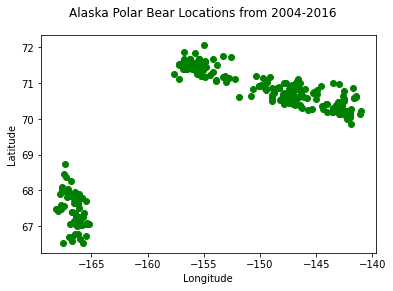

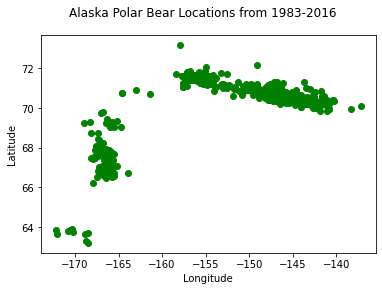

In [27]:
x, y = newdata['longitude'], newdata['latitude']
fig, (ax1) = plt.subplots(1)
fig.suptitle('Alaska Polar Bear Locations from 2004-2016')
ax1.scatter(x, y, color = 'g')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#Looking at data overall and comparing to just 2004-2016
x, y = catalog['longitude'], catalog['latitude']
fig, (ax1) = plt.subplots(1)
fig.suptitle('Alaska Polar Bear Locations from 1983-2016')
ax1.scatter(x, y, color = 'g')
plt.xlabel('Longitude')
plt.ylabel('Latitude')